# Deep neural network

### Imports

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"numpy version: {np.__version__}")

import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import sklearn
print(f"sklearn version: {sklearn.__version__}")

import keras
print(f"keras version: {keras.__version__}")

import sys
print(f"Python version: {sys.version}")

pandas version: 2.2.3
matplotlib version: 3.9.2
seaborn version: 0.13.2
numpy version: 1.23.5
TensorFlow version: 2.12.0
sklearn version: 1.5.2
keras version: 2.12.0
Python version: 3.9.18 (main, Sep 11 2023, 08:16:19) 
[Clang 14.0.6 ]


### Data Import

In [47]:
players_all = pd.read_csv('../games_by_players_all.csv', encoding='utf8')
players_ranked = pd.read_csv('../games_by_players_ranked.csv', encoding='utf8')
players_pro = pd.read_csv('../games_by_players_pro.csv', encoding='utf8')

teams_all = pd.read_csv('../games_by_team_all_added_features.csv', encoding='utf8')
teams_ranked = pd.read_csv('../games_by_team_ranked_added_features.csv', encoding='utf8')
teams_pro = pd.read_csv('../games_by_team_pro_added_features.csv', encoding='utf8')

small_file = pd.read_csv('../small_csv_file.csv', encoding='utf8')

In [48]:
players_all = players_all.drop(columns = ['game_id', 'player_tag', 'pro'])
players_ranked = players_ranked.drop(columns = ['game_id', 'player_tag', 'pro'])
players_pro = players_pro.drop(columns = ['game_id', 'player_tag', 'pro'])

small_file = small_file.drop(columns = ['game_id', 'player_tag', 'pro'])

# Team
teams_all = teams_all.drop(columns = ['pro'])
teams_ranked = teams_ranked.drop(columns = ['pro'])
teams_pro = teams_pro.drop(columns = ['pro'])

### X,y division

In [49]:
X_players_all = players_all.iloc[:, 0:44]
X_players_ranked = players_ranked.iloc[:, 0:44]
X_players_pro = players_pro.iloc[:, 0:44]
X_small_file = small_file.iloc[:, 0:44]

In [50]:
y_players_all = players_all.iloc[:, 44]
y_players_ranked = players_ranked.iloc[:, 44]
y_players_pro = players_pro.iloc[:, 44]
y_small_file = small_file.iloc[:, 44]


In [51]:
# team
X_teams_all = teams_all.iloc[:, 0:200]
X_teams_ranked = teams_ranked.iloc[:, 0:200]
X_teams_pro = teams_pro.iloc[:, 0:200]

In [52]:
# Team
y_teams_all = teams_all.iloc[:, 200]
y_teams_ranked = teams_ranked.iloc[:, 200]
y_teams_pro = teams_pro.iloc[:, 200]

### Normalization Z-score

In [53]:
# Z-score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_players_all_normalized = scaler.fit_transform(X_players_all)
X_players_ranked_normalized =  scaler.fit_transform(X_players_ranked)
X_players_pro_normalized = scaler.fit_transform(X_players_pro)
X_small_file_normalized = scaler.fit_transform(X_small_file)

X_players_all_normalized = pd.DataFrame(X_players_all_normalized, columns=X_players_all.columns)
X_players_ranked_normalized = pd.DataFrame(X_players_ranked_normalized, columns=X_players_ranked.columns)
X_players_pro_normalized = pd.DataFrame(X_players_pro_normalized, columns=X_players_pro.columns)
X_small_file_normalized = pd.DataFrame(X_small_file_normalized, columns=X_small_file.columns)

In [54]:
# Z-score for teams
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_teams_all_normalized = scaler.fit_transform(X_teams_all)
X_teams_ranked_normalized =  scaler.fit_transform(X_teams_ranked)
X_teams_pro_normalized = scaler.fit_transform(X_teams_pro)

X_teams_all_normalized = pd.DataFrame(X_teams_all_normalized, columns=X_teams_all.columns)
X_teams_ranked_normalized = pd.DataFrame(X_teams_ranked_normalized, columns=X_teams_ranked.columns)
X_teams_pro_normalized = pd.DataFrame(X_teams_pro_normalized, columns=X_teams_pro.columns)

In [55]:
# print(y_players_ranked)
X_players_ranked_normalized.head()

,movement_avg_speed,movement_total_distance,movement_time_supersonic_speed,movement_time_boost_speed,movement_time_slow_speed,movement_time_ground,movement_time_low_air,movement_time_high_air,movement_time_powerslide,movement_count_powerslide,...,positioning_percent_offensive_third,positioning_percent_neutral_third,positioning_percent_defensive_half,positioning_percent_offensive_half,positioning_percent_behind_ball,positioning_percent_infront_ball,positioning_percent_most_back,positioning_percent_most_forward,positioning_percent_closest_to_ball,positioning_percent_farthest_from_ball
0,-0.244786,-0.006564,-0.105950,-0.028138,0.536498,0.210515,0.345503,0.088237,0.262826,0.215025,...,-2.540903,-1.018220,2.796536,-2.796536,0.839287,-0.839287,-0.364511,-0.855038,1.348097,-1.015858
1,-0.864632,-0.373041,-0.027812,-0.758952,0.873504,0.984698,-0.750224,-0.864637,-0.613178,-1.117797,...,-1.971989,-1.597289,2.192010,-2.192010,-0.759975,0.759975,-0.497711,0.621517,-0.427544,-0.227942
2,-1.452418,-0.477431,-0.355434,-0.857818,1.267432,0.003658,0.408733,0.966403,0.003394,-0.907351,...,-2.304965,-1.158523,2.380453,-2.380453,-0.729034,0.729034,0.502915,-0.122149,-1.340359,0.848635
3,-0.383717,-0.070282,-0.027254,-0.445694,0.808337,0.517473,-0.419809,1.273691,-0.545793,-0.451386,...,2.113161,-0.214666,-1.652232,1.652232,1.137094,-1.137094,-0.972034,1.952572,1.687142,-0.872435
4,0.289565,0.172737,0.445481,0.232608,0.082456,0.781302,-0.247855,-0.764557,-1.310612,-1.047648,...,0.370265,1.190915,-0.526095,0.526095,1.579936,-1.579936,-0.741370,-0.544279,-0.718776,0.116999


## Train-test validation split

In [56]:
from sklearn.model_selection import train_test_split
import sklearn
print(f"sklearn version: {sklearn.__version__}")

sklearn version: 1.5.2


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_players_all_normalized, y_players_all, random_state=20, test_size=0.4)

In [58]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state=20, test_size=0.5)

## Model

In [59]:
from keras.models import Sequential
from keras.layers import Dense
import keras
print(f"keras version: {keras.__version__}")

model = Sequential([
    Dense(64, activation='relu', input_shape=(44,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') 
])

keras version: 2.12.0


In [60]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [61]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=500)

Epoch 1/20
252/252 [==============================] - 0s 1ms/step - loss: 0.5599 - accuracy: 0.7040 - val_loss: 0.5354 - val_accuracy: 0.7261
Epoch 2/20
252/252 [==============================] - 0s 818us/step - loss: 0.5293 - accuracy: 0.7280 - val_loss: 0.5323 - val_accuracy: 0.7276
Epoch 3/20
252/252 [==============================] - 0s 828us/step - loss: 0.5265 - accuracy: 0.7295 - val_loss: 0.5316 - val_accuracy: 0.7286
Epoch 4/20
252/252 [==============================] - 0s 1ms/step - loss: 0.5245 - accuracy: 0.7302 - val_loss: 0.5311 - val_accuracy: 0.7277
Epoch 5/20
252/252 [==============================] - 0s 943us/step - loss: 0.5230 - accuracy: 0.7311 - val_loss: 0.5304 - val_accuracy: 0.7277
Epoch 6/20
252/252 [==============================] - 0s 837us/step - loss: 0.5221 - accuracy: 0.7310 - val_loss: 0.5290 - val_accuracy: 0.7304
Epoch 7/20
252/252 [==============================] - 0s 951us/step - loss: 0.5210 - accuracy: 0.7322 - val_loss: 0.5295 - val_accuracy: 0.7

## Metrics

### loss accuracy

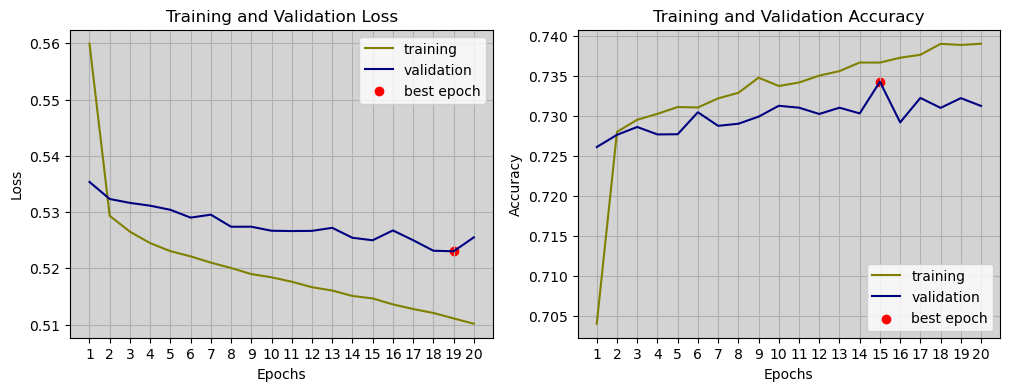

<Figure size 640x480 with 0 Axes>

In [62]:
# Get best loss and accuracy Scores
best_epoch_loss = history.history['val_loss'].index(min(history.history['val_loss']))
best_epoch_accuracy = history.history['val_accuracy'].index(max(history.history['val_accuracy']))

# Prepare figure
plt.figure(figsize=(12, 4))
epochs = range(1, len(history.history['loss']) + 1)

# Plot loss
plt.subplot(1,2,1)
plt.title('Training and Validation Loss')
plt.plot(epochs, history.history['loss'], color='olive', label='training')
plt.plot(epochs, history.history['val_loss'], color='navy', label='validation')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.grid(True) 
plt.gca().set_facecolor('lightgray') 
plt.scatter(best_epoch_loss + 1, history.history['val_loss'][best_epoch_loss], color='red', label='best epoch')
plt.legend(['training', 'validation', 'best epoch'])
plt.xticks(epochs)

# Plot accuracy
plt.subplot(1,2,2)
plt.title('Training and Validation Accuracy')
plt.plot(epochs, history.history['accuracy'], color='olive', label='training')
plt.plot(epochs, history.history['val_accuracy'], color='navy', label='validation')
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.grid(True) 
plt.gca().set_facecolor('lightgray') 
plt.scatter(best_epoch_accuracy + 1, history.history['val_accuracy'][best_epoch_accuracy], color='red', label='best epoch')
plt.legend(['training', 'validation', 'best epoch'])
plt.xticks(epochs)

plt.subplots_adjust(hspace=0.3)

# Show plot
plt.show()
plt.close()
plt.clf()

### Scores

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
print("DNN Accuracy:", accuracy_score(y_test, y_pred_classes))

1310/1310 [==============================] - 0s 267us/step
DNN Accuracy: 0.7349699398797596


In [65]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [66]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print("accuracy", accuracy)
print("recall", recall)
print("precision", precision)
print("f1", f1)

1310/1310 [==============================] - 0s 270us/step
accuracy 0.7349699398797596
recall 0.7659027016724639
precision 0.7217781769196228
f1 0.743186073930231


In [67]:
### Not possible in DNN
# model.score(X_test, y_test)

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

       False       0.75      0.70      0.73     20929
        True       0.72      0.77      0.74     20987

    accuracy                           0.73     41916
   macro avg       0.74      0.73      0.73     41916
weighted avg       0.74      0.73      0.73     41916



### Confusion matrix

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
print(confusion_matrix(y_test, y_pred_classes))

[[14733  6196]
 [ 4913 16074]]


[[14733  6196]
 [ 4913 16074]]
0.7349699398797596


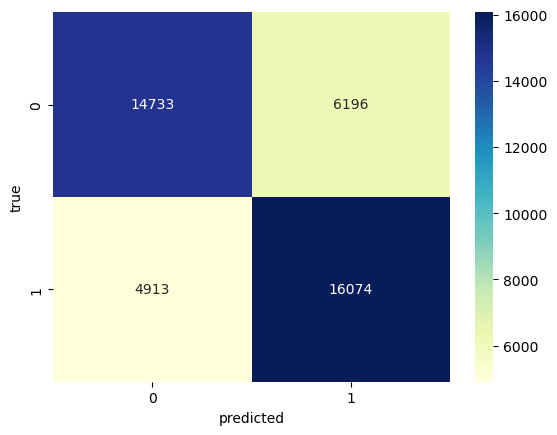

In [72]:
cm = confusion_matrix(y_test, y_pred_classes)
accuracy = accuracy_score(y_test, y_pred_classes)
print(cm)
print(accuracy)
labels = list(y_train.keys())

s = sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f")
s.set_xlabel("predicted")
s.set_ylabel("true")
plt.show()


### ROC scores

1310/1310 [==============================] - 0s 278us/step
ROC AUC Score: 0.816


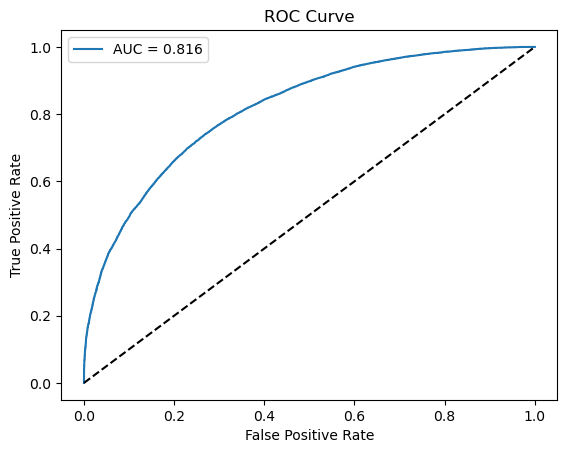

In [73]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test)
# print(y_pred_proba[:100]) 

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Feature importance

/opt/anaconda3/envs/Rocket-League-env/lib/python3.9/site-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/opt/anaconda3/envs/Rocket-League-env/lib/python3.9/site-packages/keras/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


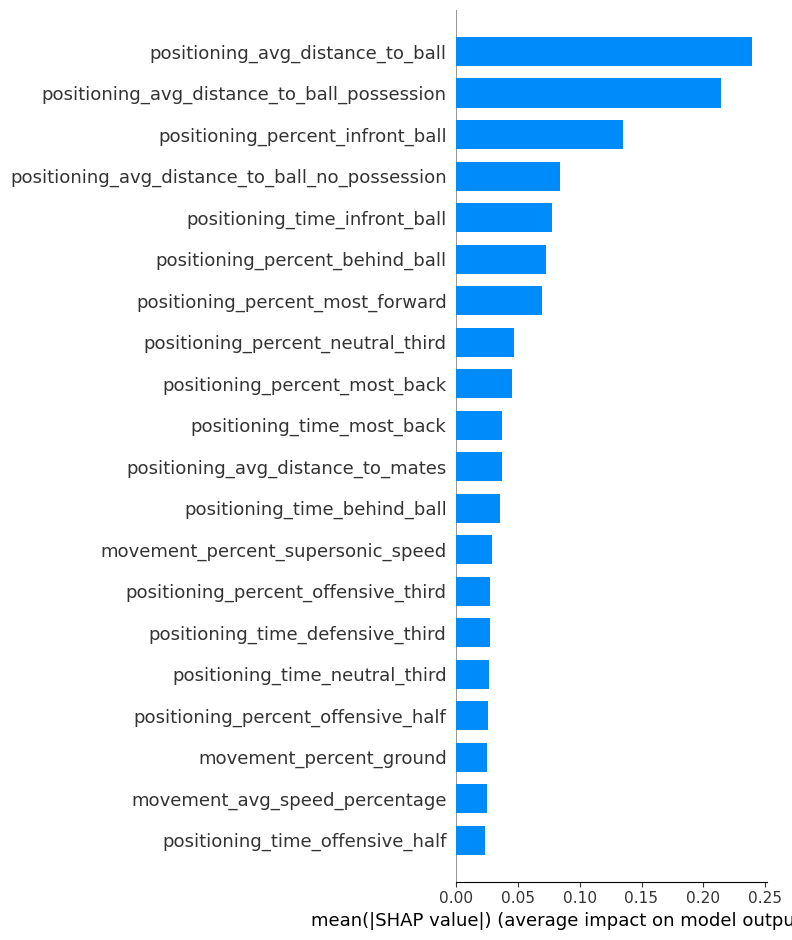

In [74]:
import shap

explainer = shap.DeepExplainer(model, X_train[:100].to_numpy())
shap_values = explainer.shap_values(X_test[:10].to_numpy())
shap.summary_plot(shap_values[..., 0], X_test[:10].to_numpy(), plot_type="bar", feature_names=X_test.columns)

## Model 2 -----------------------------

In [75]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import keras
print(f"keras version: {keras.__version__}")

model2 = Sequential([
    Dense(64, activation='relu', input_shape=(44,)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid') 
])

keras version: 2.12.0


In [76]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [77]:
history2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=700)

Epoch 1/25
180/180 [==============================] - 1s 2ms/step - loss: 0.6032 - accuracy: 0.6684 - val_loss: 0.5385 - val_accuracy: 0.7241
Epoch 2/25
180/180 [==============================] - 0s 2ms/step - loss: 0.5492 - accuracy: 0.7190 - val_loss: 0.5350 - val_accuracy: 0.7265
Epoch 3/25
180/180 [==============================] - 0s 2ms/step - loss: 0.5426 - accuracy: 0.7219 - val_loss: 0.5335 - val_accuracy: 0.7269
Epoch 4/25
180/180 [==============================] - 0s 2ms/step - loss: 0.5398 - accuracy: 0.7239 - val_loss: 0.5322 - val_accuracy: 0.7279
Epoch 5/25
180/180 [==============================] - 0s 2ms/step - loss: 0.5377 - accuracy: 0.7252 - val_loss: 0.5316 - val_accuracy: 0.7277
Epoch 6/25
180/180 [==============================] - 0s 2ms/step - loss: 0.5356 - accuracy: 0.7266 - val_loss: 0.5308 - val_accuracy: 0.7283
Epoch 7/25
180/180 [==============================] - 0s 2ms/step - loss: 0.5353 - accuracy: 0.7266 - val_loss: 0.5311 - val_accuracy: 0.7278
Epoch 

## Metrics

### loss accuracy

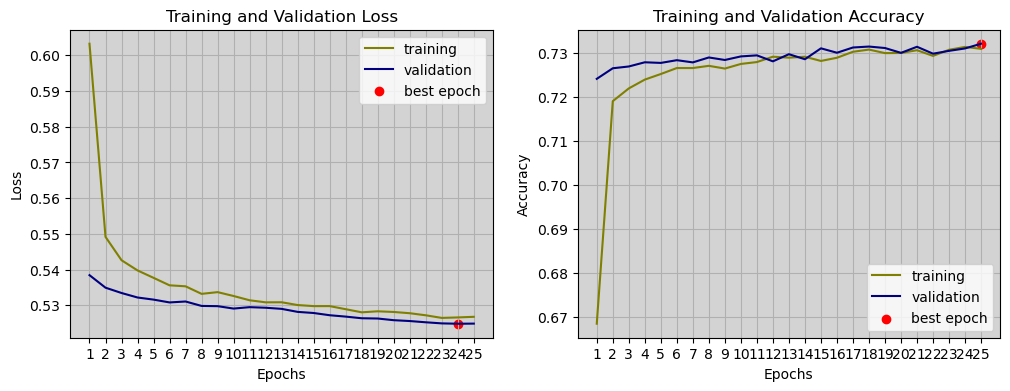

<Figure size 640x480 with 0 Axes>

In [78]:
# Get best loss and accuracy Scores
best_epoch_loss = history2.history['val_loss'].index(min(history2.history['val_loss']))
best_epoch_accuracy = history2.history['val_accuracy'].index(max(history2.history['val_accuracy']))

# Prepare figure
plt.figure(figsize=(12, 4))
epochs = range(1, len(history2.history['loss']) + 1)

# Plot loss
plt.subplot(1,2,1)
plt.title('Training and Validation Loss')
plt.plot(epochs, history2.history['loss'], color='olive', label='training')
plt.plot(epochs, history2.history['val_loss'], color='navy', label='validation')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.grid(True) 
plt.gca().set_facecolor('lightgray') 
plt.scatter(best_epoch_loss + 1, history2.history['val_loss'][best_epoch_loss], color='red', label='best epoch')
plt.legend(['training', 'validation', 'best epoch'])
plt.xticks(epochs)

# Plot accuracy
plt.subplot(1,2,2)
plt.title('Training and Validation Accuracy')
plt.plot(epochs, history2.history['accuracy'], color='olive', label='training')
plt.plot(epochs, history2.history['val_accuracy'], color='navy', label='validation')
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.grid(True) 
plt.gca().set_facecolor('lightgray') 
plt.scatter(best_epoch_accuracy + 1, history2.history['val_accuracy'][best_epoch_accuracy], color='red', label='best epoch')
plt.legend(['training', 'validation', 'best epoch'])
plt.xticks(epochs)

plt.subplots_adjust(hspace=0.3)

# Show plot
plt.show()
plt.close()
plt.clf()

### Scores

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
from sklearn.metrics import accuracy_score

y_pred2 = model2.predict(X_test)
y_pred_classes2 = (y_pred2 > 0.5).astype(int)
print("DNN Accuracy:", accuracy_score(y_test, y_pred_classes2))

1310/1310 [==============================] - 0s 291us/step
DNN Accuracy: 0.7349699398797596


In [81]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [82]:
y_pred2 = model.predict(X_test)
y_pred_classes2 = (y_pred2 > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_classes2)
recall = recall_score(y_test, y_pred_classes2)
precision = precision_score(y_test, y_pred_classes2)
f1 = f1_score(y_test, y_pred_classes2)

print("accuracy", accuracy)
print("recall", recall)
print("precision", precision)
print("f1", f1)

1310/1310 [==============================] - 0s 249us/step
accuracy 0.7349699398797596
recall 0.7659027016724639
precision 0.7217781769196228
f1 0.743186073930231


In [83]:
### Not possible in DNN
# model.score(X_test, y_test)

In [84]:
from sklearn.metrics import classification_report

In [85]:
print(classification_report(y_test, y_pred_classes2))

              precision    recall  f1-score   support

       False       0.75      0.70      0.73     20929
        True       0.72      0.77      0.74     20987

    accuracy                           0.73     41916
   macro avg       0.74      0.73      0.73     41916
weighted avg       0.74      0.73      0.73     41916



### Confusion matrix

In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
print(confusion_matrix(y_test, y_pred_classes2))

[[14733  6196]
 [ 4913 16074]]


[[14733  6196]
 [ 4913 16074]]
0.7349699398797596


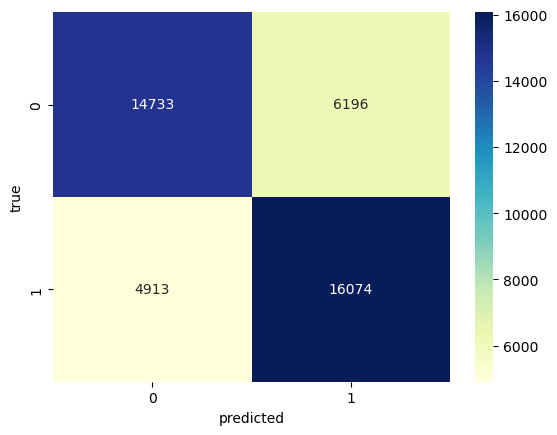

In [88]:
cm = confusion_matrix(y_test, y_pred_classes2)
accuracy = accuracy_score(y_test, y_pred_classes2)
print(cm)
print(accuracy)
labels = list(y_train.keys())

s = sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f")
s.set_xlabel("predicted")
s.set_ylabel("true")
plt.show()


### ROC scores

1310/1310 [==============================] - 0s 255us/step
ROC AUC Score: 0.817


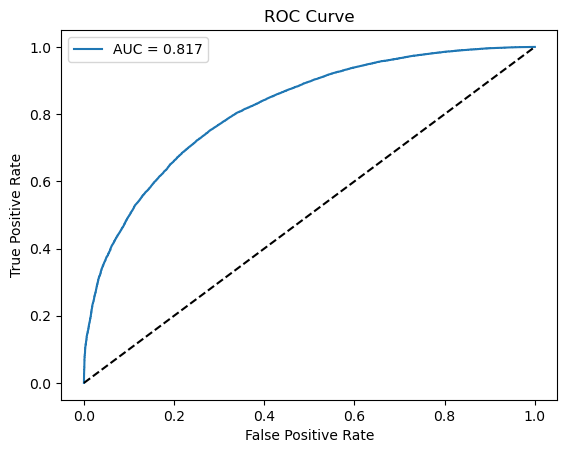

In [89]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_pred_proba = model2.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Feature importance

/opt/anaconda3/envs/Rocket-League-env/lib/python3.9/site-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/opt/anaconda3/envs/Rocket-League-env/lib/python3.9/site-packages/keras/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


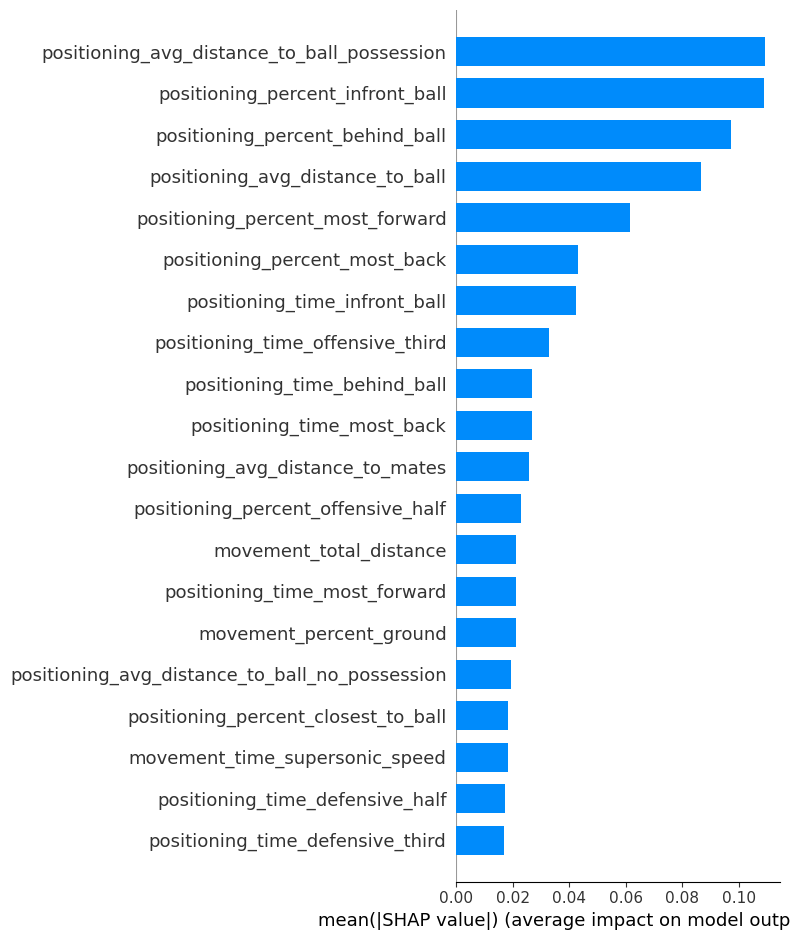

In [90]:
import shap

explainer = shap.DeepExplainer(model2, X_train[:100].to_numpy())
shap_values = explainer.shap_values(X_test[:10].to_numpy())
shap.summary_plot(shap_values[..., 0], X_test[:10].to_numpy(), plot_type="bar", feature_names=X_test.columns)